This notebook studies the data with generic time-series tools to look for correlations/relationship.

In [13]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker

In [14]:
#load the data to study
full = pd.read_csv('../data/full_final.csv', index_col=0)
full.head()

,p2_calib,int_deliv_inv_ub
2018-05-12 20:37:21,0.544752,0.974889
2018-05-13 08:37:21,0.622046,0.996325
2018-05-13 20:37:21,0.480973,0.996265
2018-05-14 08:37:21,0.625921,0.981931
2018-05-14 20:37:21,0.680721,0.987933


In [15]:
full.tail()

,p2_calib,int_deliv_inv_ub
2018-12-02 10:27:23,0.589206,0.0
2018-12-02 11:27:23,0.610330,0.0
2018-12-02 12:27:23,0.565019,0.0
2018-12-02 13:27:23,0.576858,0.0
2018-12-02 14:27:23,0.579135,0.0


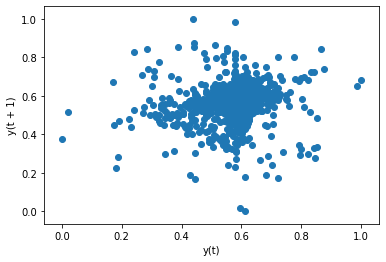

In [16]:
pd.plotting.lag_plot(full.p2_calib, lag=1)

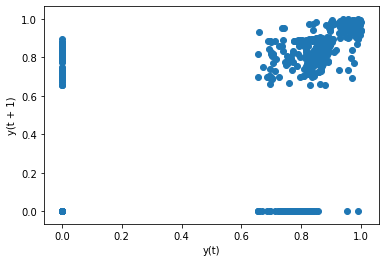

In [17]:
pd.plotting.lag_plot(full.int_deliv_inv_ub, lag=1)

(-0.2, 0.2)

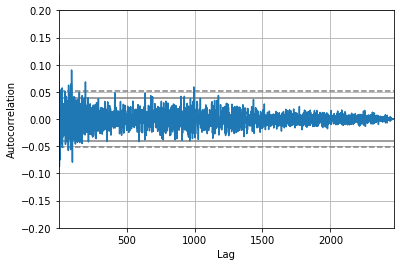

In [18]:
pd.plotting.autocorrelation_plot(full.p2_calib)
plt.ylim([-0.2, 0.2])

(-0.15, 0.5)

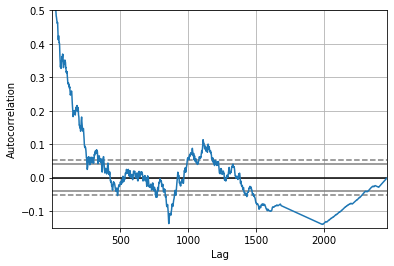

In [19]:
pd.plotting.autocorrelation_plot(full.int_deliv_inv_ub)
plt.ylim([-.15,.5])

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

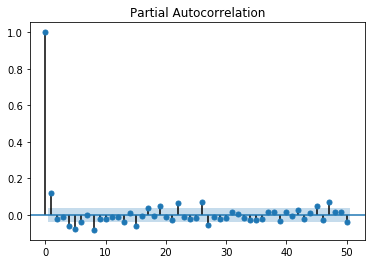

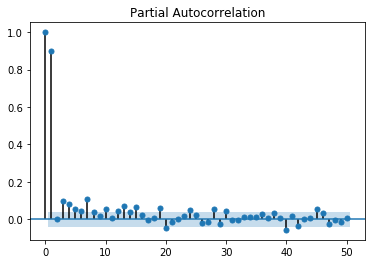

In [21]:
plot_pacf(full.p2_calib, lags=50)
plot_pacf(full.int_deliv_inv_ub, lags=50)

plt.show()

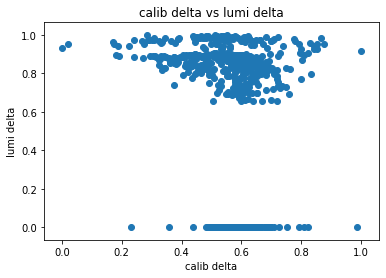

In [22]:
#plot of the two versus each other
fig, ax = plt.subplots()

ax.set_title('calib delta vs lumi delta')
ax.set_xlabel('calib delta')
ax.set_ylabel('lumi delta')

ax.scatter(full.p2_calib, full.int_deliv_inv_ub)

fig.show()

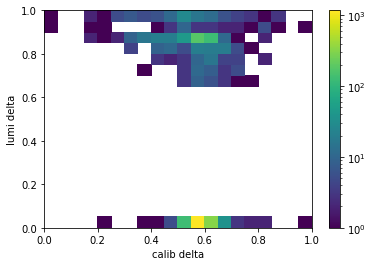

In [24]:
fig, ax = plt.subplots()
import matplotlib.colors as clrs
ax.set_xlabel('calib delta')
ax.set_ylabel('lumi delta')

h = ax.hist2d(full.p2_calib, full.int_deliv_inv_ub, bins=[20, 20],  
               norm=clrs.LogNorm())
fig.colorbar(h[3], ax=ax)
fig.show()